In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score

In [2]:
lst1 = [2,4,7,8,35,38,45,36,55,57]
lst2 = [3,5,9,15,50,55,45,60,65,68] 

In [3]:
df = pd.DataFrame({"A" : lst1, "B" : lst2})

In [5]:
import seaborn as sns

In [8]:
model = KMeans(n_clusters=2)

In [9]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
model.cluster_centers_

array([[ 5.25      ,  8.        ],
       [44.33333333, 57.16666667]])

In [22]:
model.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [23]:
aa = model.fit_transform(df)

In [24]:
aa

array([[68.74691912,  5.96343022],
       [65.94041924,  3.25      ],
       [60.94100061,  2.01556444],
       [55.66092785,  7.52080448],
       [11.76742207, 51.46904409],
       [ 6.69369521, 57.28492385],
       [12.18491782, 54.30527138],
       [ 8.80183062, 60.41160898],
       [13.23400502, 75.65753432],
       [16.66749998, 79.23422556]])

In [25]:
model.inertia_

968.9166666666666

In [26]:
silhouette_score(df,model.predict(df))

0.7886630925339897

In [32]:
silhouette_samples(df,model.predict(df))

array([0.88375397, 0.90632614, 0.89710426, 0.81963146, 0.68731774,
       0.76902991, 0.67177149, 0.75157253, 0.761245  , 0.73887843])

In [13]:
df['Cluster'] = model.labels_

In [33]:
model.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [43]:
model.fit_predict(df)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
df.drop("Cluster", axis=1, inplace=True)

In [44]:
df1 = pd.DataFrame({"A" : [5,6], "B" : [6,7]})

In [45]:
df1

,A,B
0,5,6
1,6,7


In [46]:
model.predict(df1)

array([1, 1], dtype=int32)

In [151]:
lst11 = [2,4,7,8,35,80,45,36,55,57, 2,4,57]
lst12 = [30,50,14000,20000,5000,5500,90000,8000,75000,9800,450,7000,8000] 

In [152]:
df = pd.DataFrame({"A":lst11, "B":lst12})

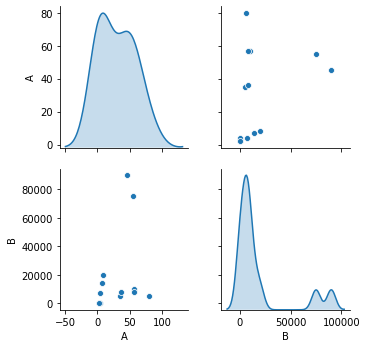

In [153]:
sns.pairplot(df, diag_kind='kde')

In [154]:
model = KMeans(n_clusters=2)

In [155]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [156]:
model.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int32)

In [157]:
df['Cluster'] = model.labels_

/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


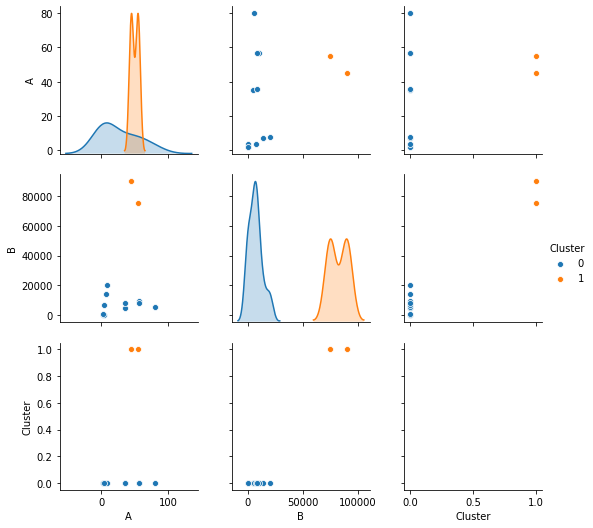

In [163]:
sns.pairplot(df, diag_kind='kde', hue='Cluster')

In [158]:
df

,A,B,Cluster
0,2,30,0
1,4,50,0
2,7,14000,0
3,8,20000,0
4,35,5000,0
5,80,5500,0
6,45,90000,1
7,36,8000,0
8,55,75000,1
9,57,9800,0


In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
sc = StandardScaler()

In [105]:
df1 = df.copy()

In [106]:
df1.drop("Cluster", axis=1, inplace=True)

In [107]:
dfnormal = sc.fit_transform(df1)

In [108]:
dfnormal

array([[-1.2093123 , -0.74199139],
       [-1.13103966, -0.74133788],
       [-1.0136307 , -0.28551703],
       [-0.97449438, -0.08946505],
       [ 0.08218627, -0.579595  ],
       [ 1.84332069, -0.56325734],
       [ 0.47354948,  2.19780803],
       [ 0.12132259, -0.48156901],
       [ 0.86491268,  1.70767809],
       [ 0.94318532, -0.42275342]])

In [109]:
df2 = pd.DataFrame(dfnormal)

In [110]:
df2.columns = df1.columns

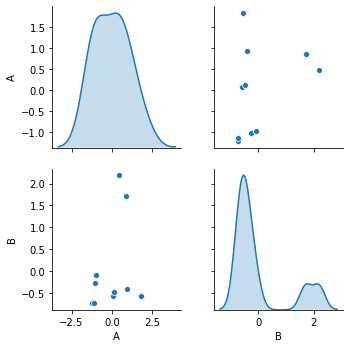

In [111]:
sns.pairplot(df2, diag_kind='kde')

In [112]:
model = KMeans(n_clusters=2)

In [113]:
model.fit(dfnormal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
model.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [159]:
lst21 = [2,4,57]
lst22 = [450,7000,8000] 

In [160]:
df3 = pd.DataFrame({"A":lst21, "B":lst22})

In [161]:
model.predict(df3)

array([0, 0, 0], dtype=int32)

In [149]:
model.fit_predict(df3)

array([0, 1, 1], dtype=int32)

In [136]:
normal = sc.fit_transform(df3)

In [137]:
normal

array([[-0.74600684, -1.40366273],
       [-0.66747981,  0.55250554],
       [ 1.41348665,  0.85115719]])

In [138]:
model.predict(normal)

array([1, 1, 1], dtype=int32)

In [121]:
model.fit_predict(normal)

array([0, 0, 1], dtype=int32)

In [94]:
model.fit_predict(df3)

array([1, 0, 0], dtype=int32)

In [84]:
model.predict(df3)

array([0, 1, 1], dtype=int32)

In [122]:
lst1 = [2,4,7,8,14,20,25,28,35,38]
lst2 = [3,5,18,4,55,23,13,78,34,88] 

In [128]:
lst1 = [2,4,2,8,10,15,25,18,35,21]
lst2 = [3,5,9,15,30,25,27,30,38,20] 

In [101]:
lst1 = [2,4,2,8,10,15,25,18,35,21]
lst2 = [2,4,2,8,10,15,25,18,35,21] 

In [143]:
df = pd.DataFrame({"A":lst1, "B":lst2})

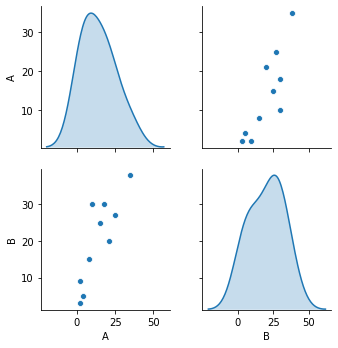

In [144]:
sns.pairplot(df,diag_kind='kde')

In [145]:
df.corr()

,A,B
A,1.000000,0.842157
B,0.842157,1.000000


In [146]:
df.cov()

,A,B
A,118.666667,108.444444
B,108.444444,139.733333


In [147]:
sc = StandardScaler()

In [148]:
dfnor = sc.fit_transform(df)

In [149]:
dfnor1 = pd.DataFrame(dfnor)

In [150]:
dfnor1.columns = df.columns

In [152]:
dfnor1.T

,0,1,2,3,4,5,6,7,8,9
A,-1.161169,-0.967641,-1.161169,-0.580585,-0.387056,0.096764,1.064405,0.387056,2.032047,0.677349
B,-1.533759,-1.355415,-0.998727,-0.463695,0.873886,0.428026,0.606370,0.873886,1.587262,-0.017834


In [153]:
print(np.cov(dfnor1.T))

[[1.11111111 0.93572971]
 [0.93572971 1.11111111]]


In [154]:
print(np.cov(dfnor1))

[[ 0.06941154  0.07224027 -0.03026222 -0.02177603 -0.23490711 -0.06171235
   0.08532965 -0.09069384  0.08286101  0.12950907]
 [ 0.07224027  0.07518428 -0.03149549 -0.02266346 -0.24448028 -0.06422731
   0.08880709 -0.09438989  0.08623784  0.13478695]
 [-0.03026222 -0.03149549  0.0131938   0.00949396  0.10241538  0.0269055
  -0.03720223  0.03954092 -0.03612594 -0.05646368]
 [-0.02177603 -0.02266346  0.00949396  0.00683165  0.07369585  0.01936061
  -0.02676991  0.02845278 -0.02599544 -0.04063002]
 [-0.23490711 -0.24448028  0.10241538  0.07369585  0.79498807  0.20885099
  -0.2887782   0.30693206 -0.28042366 -0.43829309]
 [-0.06171235 -0.06422731  0.0269055   0.01936061  0.20885099  0.05486716
  -0.0758648   0.08063399 -0.07366998 -0.1151438 ]
 [ 0.08532965  0.08880709 -0.03720223 -0.02676991 -0.2887782  -0.0758648
   0.10489824 -0.1114926   0.10186346  0.1592093 ]
 [-0.09069384 -0.09438989  0.03954092  0.02845278  0.30693206  0.08063399
  -0.1114926   0.11850151 -0.10826705 -0.16921789]
 [

In [155]:
df

,A,B
0,2,3
1,4,5
2,2,9
3,8,15
4,10,30
5,15,25
6,25,27
7,18,30
8,35,38
9,21,20


In [158]:
np.cov(df)

array([[  0.5,   0.5,   3.5,   3.5,  10. ,   5. ,   1. ,   6. ,   1.5,
         -0.5],
       [  0.5,   0.5,   3.5,   3.5,  10. ,   5. ,   1. ,   6. ,   1.5,
         -0.5],
       [  3.5,   3.5,  24.5,  24.5,  70. ,  35. ,   7. ,  42. ,  10.5,
         -3.5],
       [  3.5,   3.5,  24.5,  24.5,  70. ,  35. ,   7. ,  42. ,  10.5,
         -3.5],
       [ 10. ,  10. ,  70. ,  70. , 200. , 100. ,  20. , 120. ,  30. ,
        -10. ],
       [  5. ,   5. ,  35. ,  35. , 100. ,  50. ,  10. ,  60. ,  15. ,
         -5. ],
       [  1. ,   1. ,   7. ,   7. ,  20. ,  10. ,   2. ,  12. ,   3. ,
         -1. ],
       [  6. ,   6. ,  42. ,  42. , 120. ,  60. ,  12. ,  72. ,  18. ,
         -6. ],
       [  1.5,   1.5,  10.5,  10.5,  30. ,  15. ,   3. ,  18. ,   4.5,
         -1.5],
       [ -0.5,  -0.5,  -3.5,  -3.5, -10. ,  -5. ,  -1. ,  -6. ,  -1.5,
          0.5]])

In [159]:
df12 = pd.DataFrame(np.cov(df))

In [160]:
df12

,0,1,2,3,4,5,6,7,8,9
0,0.5,0.5,3.5,3.5,10.0,5.0,1.0,6.0,1.5,-0.5
1,0.5,0.5,3.5,3.5,10.0,5.0,1.0,6.0,1.5,-0.5
2,3.5,3.5,24.5,24.5,70.0,35.0,7.0,42.0,10.5,-3.5
3,3.5,3.5,24.5,24.5,70.0,35.0,7.0,42.0,10.5,-3.5
4,10.0,10.0,70.0,70.0,200.0,100.0,20.0,120.0,30.0,-10.0
5,5.0,5.0,35.0,35.0,100.0,50.0,10.0,60.0,15.0,-5.0
6,1.0,1.0,7.0,7.0,20.0,10.0,2.0,12.0,3.0,-1.0
7,6.0,6.0,42.0,42.0,120.0,60.0,12.0,72.0,18.0,-6.0
8,1.5,1.5,10.5,10.5,30.0,15.0,3.0,18.0,4.5,-1.5
9,-0.5,-0.5,-3.5,-3.5,-10.0,-5.0,-1.0,-6.0,-1.5,0.5
